In [1]:
# importing required packages

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import IPython
import csv
import pandas as pd

import matplotlib #scientific plots
import matplotlib.pyplot as plt

import numpy as np # numerical programming

import sklearn #scikit-learn
import math #Mathematical functions
import pylab 
import time
import pprint as pp
from mpl_toolkits.mplot3d import Axes3D #we use this to plot 3d
from matplotlib.ticker import NullFormatter #No labels on the ticks.
from IPython.display import Image
from __future__ import division

Now we will import the data. Here I am using pandas to import data and I will aslo display some data.

In [2]:
#number of rows and columns to display
#pd.options.display.max_rows = 400
#pd.options.display.max_columns = 30
#reading data from csv file using pandas
collected_data = pd.read_csv('SFE Data.csv', delimiter =',',index_col = None, header = 0)
#collected_data.shape #to check the size of data
collected_data.head(2) #gives two values of columns



,C,N,P,S,V,Ni,Nb,Al,Ti,Fe,...,Cr,Cu,DOI,url,SFE,Error,title,Author,temperature,experiment_type
0,0.004,0.003,0.025,0.001,0.0,15.6,0.0,0.0,0.0,64.317,...,17.5,0.0,10.1007/s11661-013-1943-0,http://link.springer.com/article/10.1007/s1166...,51.6,0.014341,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300,TEM - WBDF
1,0.020,0.009,0.022,0.001,0.0,15.6,0.0,0.0,0.0,64.188,...,17.6,0.0,10.1007/s11661-013-1943-0,http://link.springer.com/article/10.1007/s1166...,54.6,0.023810,The Effect of Chemical Composition and Heat Tr...,"Yonezawa, Toshio",300,TEM - WBDF


We are pre-processing the collected data.

In [3]:
#First we are reducing the collected data by considering the data which is done at room temperature 
#certain column selection name["1"] if twoname[["1",""]]
data_red1 = collected_data[(collected_data["temperature"]>290) & (collected_data["temperature"]<310)]
#data_roomtemp.shape
len(data_red1)

426

Now from room temperature data we will subset the data by considering experimental measurements 

In [4]:
data_red1["experiment_type"].unique()

array(['TEM - WBDF', 'XRD', 'TEM', 'Thermodynamic Modeling',
       'Synchrotron XRD', 'TEM-WBDF', 'Neutron Diffraction',
       'Literature Review', 'Literature review'], dtype=object)

In [5]:
data_red2=data_red1[(data_red1["experiment_type"]!="Thermodynamic Modeling")]
len(data_red2)

387

In [6]:
#dropping columns DOI and URL
#Alternative to specifying axis (labels, axis=1 is equivalent to columns=labels).
data_red2 = data_red2.drop(['DOI', 'url'], axis=1) 

data_red2.columns.values #display of column headers 

array(['C', 'N', 'P', 'S', 'V', 'Ni', 'Nb', 'Al', 'Ti', 'Fe', 'Hf', 'Mo',
       'Mn', 'Co', 'Si', 'Cr', 'Cu', 'SFE', 'Error', 'title', 'Author',
       'temperature', 'experiment_type'], dtype=object)

next only with ferrous alloys. the data from Unfried-Silgado, Jimy is only not ferrous alloys

In [7]:
data_red3=data_red2[(data_red2["Author"]!="Unfried-Silgado, Jimy")]
len(data_red3)

379

we are selecting only requried alloys because few alloys have very very less measurements.

In [8]:
alloys_header = data_red3[data_red3.columns[:17]]
#alloys_header.columns.values 

for i in alloys_header:
   print(i, len(alloys_header[alloys_header[i]> 0]) , len(alloys_header[alloys_header[i]> 0.05]))



C 339 98
N 248 85
P 170 7
S 170 1
V 0 0
Ni 300 300
Nb 2 2
Al 34 27
Ti 0 0
Fe 379 379
Hf 0 0
Mo 168 133
Mn 305 217
Co 3 3
Si 240 120
Cr 332 332
Cu 6 6


In [9]:
#if we check p s only few elements are more than 0.05 its due substantial alloying additions 
#and not because of impurity or trace additions. so this vcan be neglected
# we can also neglect v, ti, hf since there are zero. but we will display p,s, nb, co, cu to see if we can remove them
#alloys_header1 = ['P','S','Nb','Co','Cu']
alloys_header1 = alloys_header[['P','S','Nb','Co','Cu']]

for m in alloys_header1:
   print(m, alloys_header1[alloys_header1[m]> 0.05] )


P          P      S   Nb   Co   Cu
65   0.071  0.033  0.0  0.0  0.0
66   0.063  0.030  0.0  0.0  0.0
214  0.080  0.040  0.0  0.0  0.0
215  0.080  0.040  0.0  0.0  0.0
216  0.080  0.040  0.0  0.0  0.0
217  0.080  0.040  0.0  0.0  0.0
218  0.080  0.040  0.0  0.0  0.0
S          P     S   Nb   Co   Cu
156  0.012  0.06  0.0  0.0  0.0
Nb        P    S    Nb   Co   Cu
351  0.0  0.0  1.00  0.0  0.0
353  0.0  0.0  0.52  0.0  0.0
Co         P      S   Nb     Co   Cu
256  0.00  0.000  0.0   6.42  0.0
335  0.01  0.014  0.0  20.20  0.0
339  0.00  0.000  0.0   9.55  0.0
Cu        P    S   Nb   Co    Cu
117  0.0  0.0  0.0  0.0  0.23
132  0.0  0.0  0.0  0.0  0.23
237  0.0  0.0  0.0  0.0  0.37
238  0.0  0.0  0.0  0.0  0.22
239  0.0  0.0  0.0  0.0  0.14
257  0.0  0.0  0.0  0.0  5.20


the next is subset of data_red3 which have enough datapoints from 9 chosen elements

In [10]:
data_red4 = data_red3[(data_red3.Nb< 1) & (data_red3.Co< 1) & (data_red3.Cu< 1)]
len(data_red4)

374

In next data set, we will have drop values which do not have enough data points

In [11]:
data_red4 = data_red4.drop(['P','S',"V",'Nb','Co',"Ti","Hf",'Cu'], axis=1)
#print(data_red4.columns.values)
#len(data_red4.columns.values)
data_red4.shape

(374, 15)

we are converting the data into arrays, so we can work with numpy

In [12]:
#On applying the .reset_index() function, the index gets shifted to the dataframe as a separate column. It is named as index. 
#The new index of the dataframe is now integers ranging from 0 to the length of the dataframe.
first_array = data_red4.reset_index().values
print(first_array.shape)
first_array[0,:]

(374, 16)


array([0, 0.004, 0.003, 15.6, 0.0, 64.317, 2.5, 0.03, 0.02, 17.5, 51.6,
       0.014341085,
       'The Effect of Chemical Composition and Heat Treatment Conditions on Stacking Fault Energy for Fe-Cr-Ni Austenitic Stainless Steel',
       'Yonezawa, Toshio', 300, 'TEM - WBDF'], dtype=object)

In [13]:
SFE_data = first_array[:,0:12]
SFE_data = np.array(SFE_data, dtype='float')
#SFE-(1-error),each rows
lower = SFE_data[:,10]*(1 - SFE_data[:,11]) 
higher = SFE_data[:,10]*(1 + SFE_data[:,11])
lowhigh = np.column_stack((lower,higher))


In [14]:
SFE_data = np.column_stack((SFE_data,lowhigh))
print(SFE_data.shape)
print(SFE_data[0,:])

(374, 14)
[0.0000000e+00 4.0000000e-03 3.0000000e-03 1.5600000e+01 0.0000000e+00
 6.4317000e+01 2.5000000e+00 3.0000000e-02 2.0000000e-02 1.7500000e+01
 5.1600000e+01 1.4341085e-02 5.0860000e+01 5.2340000e+01]


now we will construct three ‘‘classes’’ of SFE ranges or three regimes and will map
all our SFE numerical data to categorical data.
High - SFE > 45 mJ/m2 - martensitic transformation of TRIP-like behavior
Medium -  - 20 mJ/m2 < SFE < 45 mJ/m2 - deformation twinning leading
Low - SFE< 20 mJ/m2 - deforms majorly by slip

In [15]:
SFE_classes = np.zeros(SFE_data.shape[0])

SFE_classes[SFE_data[:,10] <= 20] = 1
SFE_classes[(SFE_data[:,10] > 20) & (SFE_data[:,10] <= 45)] = 2
SFE_classes[(SFE_data[:,10] > 45)] = 3

#check number of entries for each class 
print((SFE_classes == 1).sum())
print((SFE_classes == 2).sum())
print((SFE_classes == 3).sum())

#check if only the needed classes there
print((SFE_classes == 1).sum() + (SFE_classes == 2).sum() + (SFE_classes == 3).sum()) 
SFE_classes.shape
SFE_data.shape


77
209
88
374


(374, 14)

Data Visualization

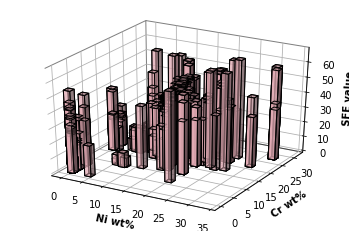

In [16]:
#now we will plot the data and see what we can visualize
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
Xpos=SFE_data[SFE_data[:,10]<70,3]
Ypos=SFE_data[SFE_data[:,10]<70,9]
Zpos=np.zeros(len(SFE_data[SFE_data[:,10]<70,10]))
dz=SFE_data[SFE_data[:,10]<70,10]
#print(len(Xpos))
#print(len(Ypos))
#ax.bar3d(x,y,z,dx,dy,dz,color, edgecolour, transpercy),breadth,width,height=vales of columns
ax.bar3d(Xpos,Ypos,Zpos,1.5,1.5,dz, edgecolor='black', color='pink', alpha=0.5)
#print(len(SFE_data[SFE_data[:,10]<70,10]))

ax.set_xlabel("Ni wt%", fontsize=10, fontweight='heavy')
#ax.set_xlim(35,0) # we can use this to show where x can with zero
# i choose the above limits after plotting image without limits and then adjusted axis
ax.set_ylabel("Cr wt%", fontsize=10, fontweight='heavy')
#ax.set_ylim(32,0)
ax.set_zlabel("SFE value", fontsize=10, fontweight='heavy')
#ax.set_zlim(0,60)
ax.xaxis.pane.set_edgecolor('black') #boders of axis, if not given it will be white
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.show()

above we took two elements(Ni and cr) and plotted. here we cannot decide anything just by SFE values, since it also depends on element values and each element have different values.
#increasing a certain element's value can lead to a certain behavior in SFE can't be applied.

Lets try to visualize each element with SFE

In [17]:
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspeci

In [64]:
#we will plot variations of SFE values varying with different percentages
element_names = data_red4.columns.values[0:10]
print(element_names) #we are taking this because np array has no attribute 'columns'

['C' 'N' 'Ni' 'Al' 'Fe' 'Mo' 'Mn' 'Si' 'Cr' 'SFE']


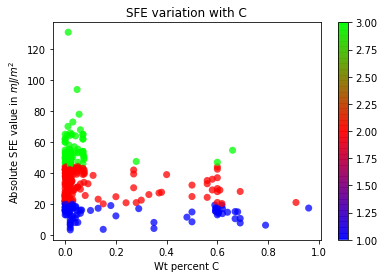

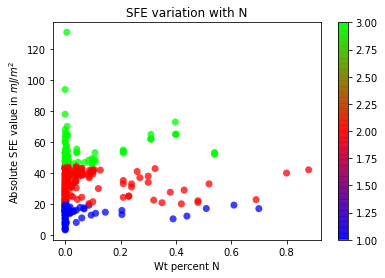

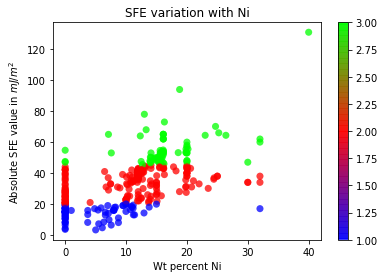

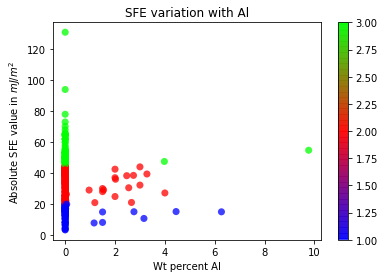

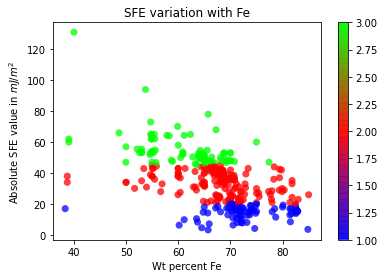

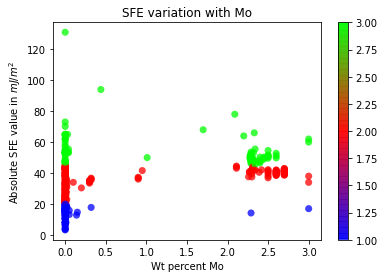

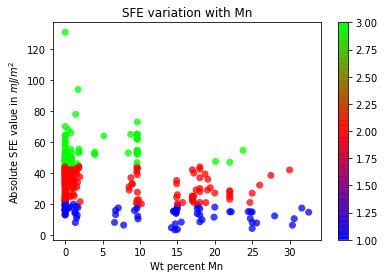

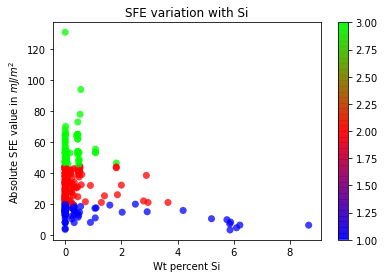

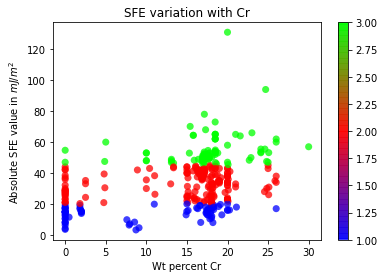

In [68]:
for i in range(1,10):
    #fig = plt.figure(figsize=(5,5))
    fig, ax = plt.subplots()
    brg=ax.scatter(SFE_data[:,i],SFE_data[:,10],c=SFE_classes,marker="o", s=50, edgecolor='',cmap ='brg', alpha=0.75)
    ax.set_xlabel("Wt percent %s"%element_names[i-1])
    ax.set_ylabel("Absolute SFE value in $mJ/m^2$")
    ax.set_title("SFE variation with %s"%element_names[i-1])
    #print(SFE_data[:,1])
    #print(SFE_data[:,10])
    fig.colorbar(brg)
    plt.show()

We can see the plots are non-linear. Each SFE classes have different wt percentages of elements, dont have one proper sequence.

now we will see variation of one element with other elements

In [70]:
for i in range(2,11):
    #fig = plt.figure(figsize=(5,5))
    fig, ax = plt.subplots()
    ax.scatter(SFE_data[:,1],SFE_data[:,i],c=SFE_classes,marker="o", s=50, edgecolor='',cmap ='brg', alpha=0.75)
    ax.set_xlabel(element_names[0])
    ax.set_ylabel(element_names[i-1])
    #ax.set_title("SFE variation with %s"%element_names[i-1])
    #print(SFE_data[:,1])
    #print(SFE_data[:,10])
    plt.show()

ValueError: 2 is not a valid value for sharex; supported values are 'all', 'row', 'col', 'none'

<Figure size 432x288 with 0 Axes>

In [ ]:
There is no same sequence of C with other elements. 
The only thing, the high SFE classes are not present as C value increasing